# Data Project - Anna, Signe og Klara

In this dataproject we examine the development of movies from 2015 to 2023. We use the "BIO5" dataset provided by Danish Statitics, which allows us to divide movies into feature films and documentaries, and to analyze the development of film censorships. 

# Imports and set magics

In [6]:
import pandas as pd
#%pip install matplotlib-venn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We import the data, downloaded from DST and start the data cleaning process. 
We perform different kind of data cleaning, in order to have a more structed dataset which will be easier to work with.

In [7]:
# Import data and dataproject functions
from dataproject import Dataproject_functions

# Initialize DataProject object
dp = Dataproject_functions('Data/BIO5.xlsx')

We start by loading the dataset from an excel file. Then we clean the data by removing columns we do not use, use forward-filling for any missing values for the "titles" of the data set. We also rename the collumn name to more meaningfull names. We also clean the year variable to only include numbers. 

In the melt step we sort the data to be a long data frame instead of a wide one. This reshaping simplifies the data handling by converting categorical columns into rows. 

In [8]:
# Load data
dp.load_data()

# Clean data
dp.clean_data()

# Melt data
dp.melt_data()

# Exploring the data set
Firstly, we want to explore the dataset a bit further. We focus on movies in Denmark, the US and the EU-28 (except Denmark), and look at the development in the number of movies and the number of sold tickets. Then we print the summary statistics.

In [9]:
# Filter data
selected_countries = ['Denmark', 'USA', 'EU-28 excluding Denmark']
selected_censorship = 'All censorship conditions'
selected_type = ['Movies (number)', 'Tickets sold (thousands)']
selected_cinema_movies = 'Feature films and documentaries, all target groups'

dp.filter_data(selected_countries, selected_censorship, selected_type, selected_cinema_movies)
dp.group_data()

# Print summary statistics
dp.print_summary_stats()

Summary Statistics:


count         mean  \
Country                 Type                                           
Denmark                 Movies (number)             9.0    30.888889   
                        Tickets sold (thousands)    9.0  2905.000000   
EU-28 excluding Denmark Movies (number)             9.0    69.222222   
                        Tickets sold (thousands)    9.0  1321.888889   
USA                     Movies (number)             9.0    86.888889   
                        Tickets sold (thousands)    9.0  5391.222222   

                                                          std     min     25%  \
Country                 Type                                                    
Denmark                 Movies (number)              6.900081    18.0    27.0   
                        Tickets sold (thousands)   514.184549  2464.0  2470.0   
EU-28 excluding Denmark Movies (number)             15.982629    38.0    66.0   
                        Tickets sold (thousands)   551.041615   514.0   887.0   
USA                     Movies (number)             16.533636    51.0    82.0   
                        Tickets sold (thousands)  1992.956145  1966.0  5010.0   

                                                     50%     75%     max  
Country                 Type                                              
Denmark                 Movies (number)             34.0    36.0    37.0  
                        Tickets sold (thousands)  2611.0  3476.0  3710.0  
EU-28 excluding Denmark Movies (number)             70.0    80.0    91.0  
                        Tickets sold (thousands)  1289.0  1558.0  2360.0  
USA                     Movies (number)             87.0    93.0   107.0  
                        Tickets sold (thousands)  6026.0  6826.0  7396.0

From the summary statistics above we see that USA has the highest average number of cinema movies and sold tickets. 
EU-28 udenfor Danmark has the second highest average number of cinema movies and sold tickets. Danmark has the 
lowest average number of cinema movies and sold tickets, which makes sense with regards to the size of the 
country/area included in the dataset.

Then we want to explore the dataset further. We still focus on movies in Denmark, the US and the EU-28, but now explore the censorship types in the data set, with regards to  number of movies within the categories.

In [10]:
# Filter and group censorship data
selected_countries_censorship = ['Denmark', 'USA', 'EU-28 excluding Denmark']
selected_censorship_censorship = ['Allowed for all', 'Discouraged for children under 7 years', 'Allowed for children over 15 years']
selected_type_censorship = ['Movies (number)']
selected_cinema_movies_censorship = 'Feature films and documentaries, all target groups'

dp.filter_and_group_data_censorship(selected_countries_censorship, selected_censorship_censorship, selected_type_censorship)
dp.compute_summary_stats_censorship()
dp.print_summary_stats_censorship()

Summary Statistics (Censorship):


count  \
Country                 Censorship                                      
Denmark                 Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   
EU-28 excluding Denmark Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   
USA                     Allowed for all                          72.0   
                        Allowed for children over 15 years       72.0   
                        Discouraged for children under 7 years   72.0   

                                                                    mean  \
Country                 Censorship                                         
Denmark                 Allowed for all                         4.291667   
                        Allowed for children over 15 years      3.208333   
                        Discouraged for children under 7 years  2.583333   
EU-28 excluding Denmark Allowed for all                         9.333333   
                        Allowed for children over 15 years      5.208333   
                        Discouraged for children under 7 years  5.708333   
USA                     Allowed for all                         9.333333   
                        Allowed for children over 15 years      9.236111   
                        Discouraged for children under 7 years  6.375000   

                                                                      std  \
Country                 Censorship                                          
Denmark                 Allowed for all                          4.348992   
                        Allowed for children over 15 years       4.205756   
                        Discouraged for children under 7 years   2.856916   
EU-28 excluding Denmark Allowed for all                          9.964727   
                        Allowed for children over 15 years       6.852444   
                        Discouraged for children under 7 years   6.576607   
USA                     Allowed for all                         10.191131   
                        Allowed for children over 15 years      12.214622   
                        Discouraged for children under 7 years   7.274183   

                                                                min   25%  \
Country                 Censorship                                          
Denmark                 Allowed for all                         0.0  0.75   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   
EU-28 excluding Denmark Allowed for all                         0.0  0.00   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   
USA                     Allowed for all                         0.0  0.00   
                        Allowed for children over 15 years      0.0  0.00   
                        Discouraged for children under 7 years  0.0  0.00   

                                                                50%    75%  \
Country                 Censorship                                           
Denmark                 Allowed for all                         3.0   7.00   
                        Allowed for children over 15 years      1.0   8.00   
                        Discouraged for children under 7 years  2.0   4.00   
EU-28 excluding Denmark Allowed for all                         5.0  18.00   
                        Allowed for children over 15 years      1.0   9.25   
                        Discouraged for children under 7 years  2.0  10.50   
USA                     Allowed for all                         3.5  18.00   
                        A

From the summary statistics above we see that the mean in general is highest for the category "Tilladt for alle", but at the same time we see that the same category also has got the highest standard deviation, hence the biggest volatility within the observations. Again we see that US has the highest mean, minimum and maximum value, next is Denmark and EU-28 with the lowest mean, minimum and maximum. 

# Analysis

Next, we want to examine the development in the number of movies and tickets sold. Therefore, we plot two figures: The number of movies and the number of sold tickets across the selected countries/areas. 

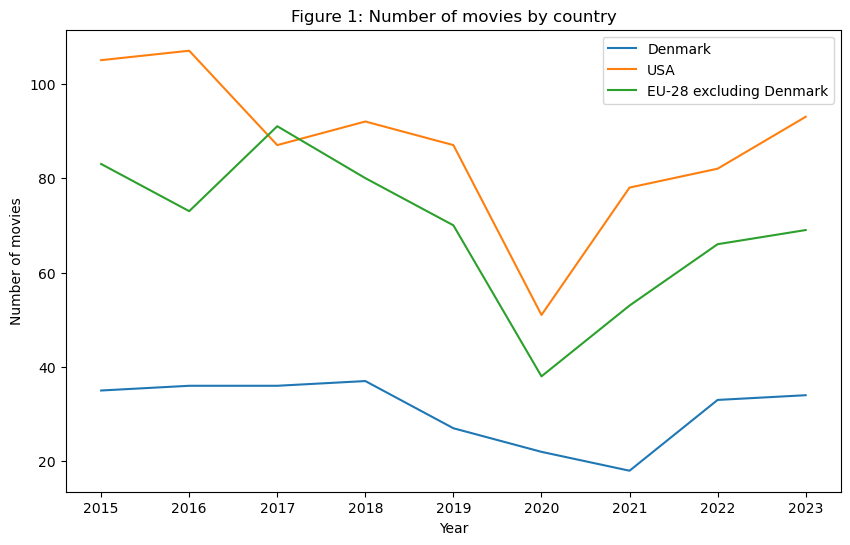

In [11]:
# Plot movies by country
dp.plot_movies_by_country_combined()

Figure 1 shows the development in number of presented movies in Denmark, the United States and the EU-28. We see that the number of movies presented in Denmark generally lies at a lower level, which is not surprising. The US presents the highest number of movies - around 90 movies in 2023. We notice, that the number of movies for Denmark seems to be more stable across the period, related to movies in the US and the EU. Specifically, the number of presented movies drops considerably in 2020, due to the outbreak and lockdown following the pandemic, however less notably in Denmark. For all areas/countries, the number of movies has been increasing since the 2021, while the levels are still lower than it's peak. 


We focus on the following censorship groups: Advised against for children under 7 years, allowed for people over 15 years, and allowed for everyone. This allows us to analyze how the development of movies has been looking from different perspectives. For example we could ask - has the structure of censorship for movies changed over the last 8 years?

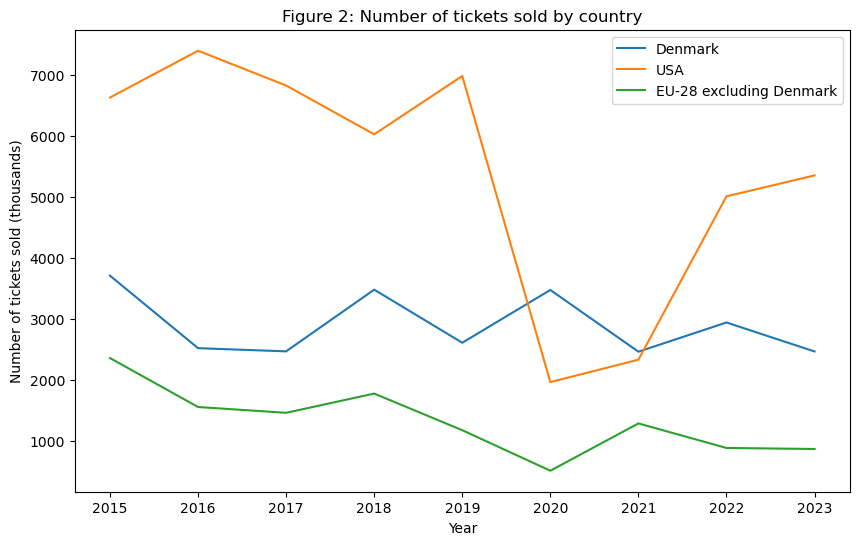

In [12]:
# Plot tickets by country
dp.plot_tickets_by_country_combined()

Figure 2 shows the number of tickets sold for the US, Denmark and EU-28 excluding Denmark. The US seems to have sold a significant larger amount of tickets for cinema movies relative Denmark and the EU-28, in the beggining of the period. In this period the US have sold around 6000-7000 tickets a year, whereas Denmark has sold between 2500-4000 tickets a year and the EU-28 between 1000-2500 a year. In the period 2019-2020 Covid-19 happens, which indeed is visible in the data. In this period the amount of tickets sold in the US decreases with almost 5000 sold tickets which makes Danmark the most ticket-selling country. It actually seems like Denmark is relatively unaffected by the crises, whereas The EU-28 decreses a bit, but not at all in the same range as the US. From 2021 and forward the US ticket sale increases again. From this it seems like the cinemas has been affected the most in the US, relative to Denmark and the EU-28, due to Covid-19. 



To further see the differences in the tickets sold during the period between 2019-2020, we dive into tickets sold in those years based on the censorship type.

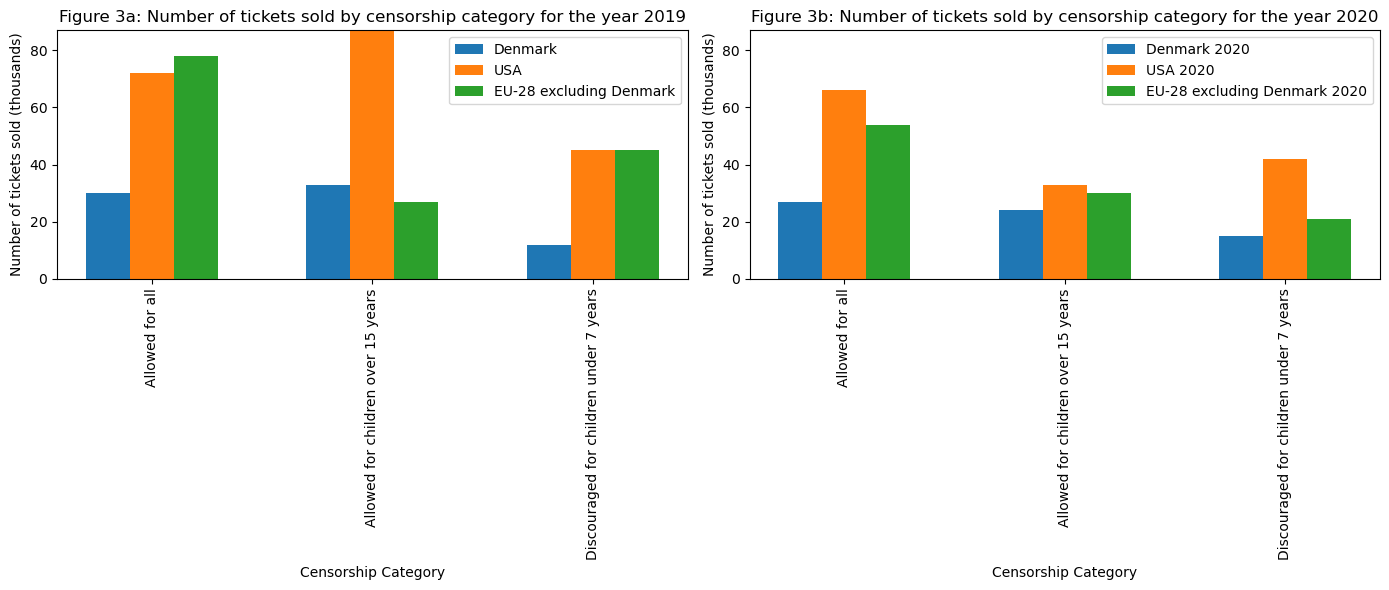

In [13]:
# Plot the censorship graph
dp.plot_censorship_graph(dp.filtered_bio_cencorship)

Figure 3a and 3b above shows the number of tickets sold by cencorship for 2019 and 2020. Firstly we notice that the only category where the US isn't "leading" regarding tickets sold was in 2020 for "Tilladt for børn over 15 år". Here Denmark has a higher number of tickets sold, which might be due to the fact that Covid-19 closing-down happened later in Denmark compared to the US - why people where still going to the cinema.

In 2019 we see, that the US has the most tickets sold for movies without censorship ("Tilladt for alle") and the same goes for EU-18. Whereas Denmark had the most tickets sold for "Tilladt for børn over 15 år". This distribution among censorhips was more or less the same in 2020, though EU-28 has a bit more tickets sold for the last censorship type "Tilladt for børn over 15 år", hereby following the danish distribution. 


Next, we wish to investigate the share of total movies and tickets (later divided on the censorship type).

In [14]:
# Print the shares
dp.print_shares()

**The share of the total number of movies for Denmark is 0.17**

**The share of the total number of movies for USA is 0.46**

**The share of the total number of movies for EU-28 excluding Denmark is 0.37**

**The share of the total number of tickets sold for Denmark is 0.30**

**The share of the total number of tickets sold for USA is 0.56**

**The share of the total number of tickets sold for EU-28 excluding Denmark is 0.14**

We see again, that among all tickets sold and all movies within all three "countries" the US has the highest share for both variables and approximately 50 pct. of the total share. Next comes Denmark and lastly EU-28, which is kind of odd, compared to EU-28 being the 27 countries in EU. (An explanation could be, that the EU28 value is the average for the 27 countries, though this is not mentioned in the dataset at first glance).

Now we wish to investigate the share, but for each censorship category. We will do this by calculating the share of the total number of tickets sold for each country by censorship category. We zoom in on the same years as before, 2019 and 2020, and will plot to figures, one for each year.

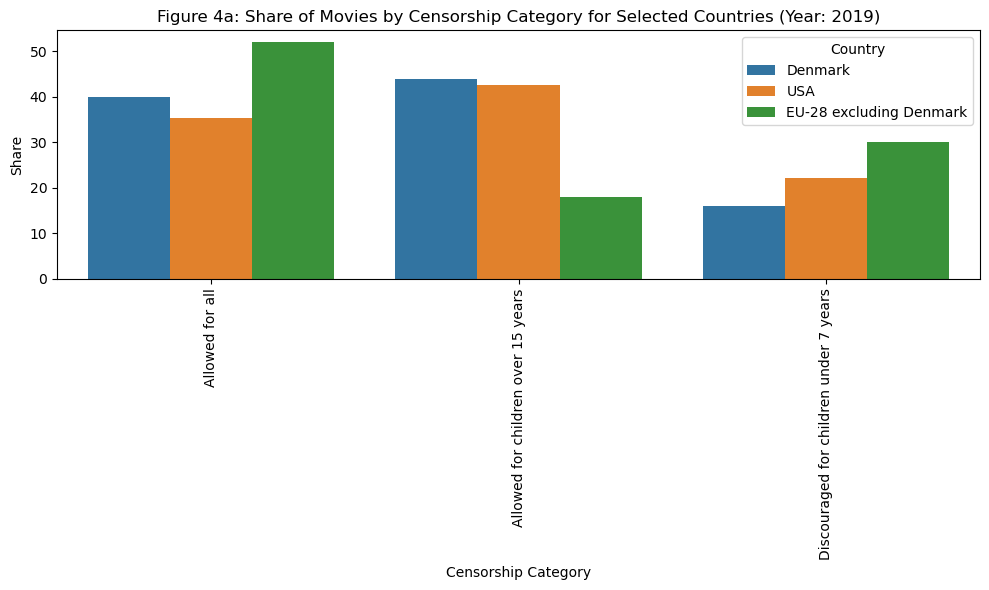

In [15]:
# Plotting the share of censorship type by country for 2019
dp.plot_censorship_graph_new('2019', selected_countries, "Figure 4a")


Figure 4a above shows the share of movies by censorship based on countries for 2019. Below the same graph is shown for 2020. 

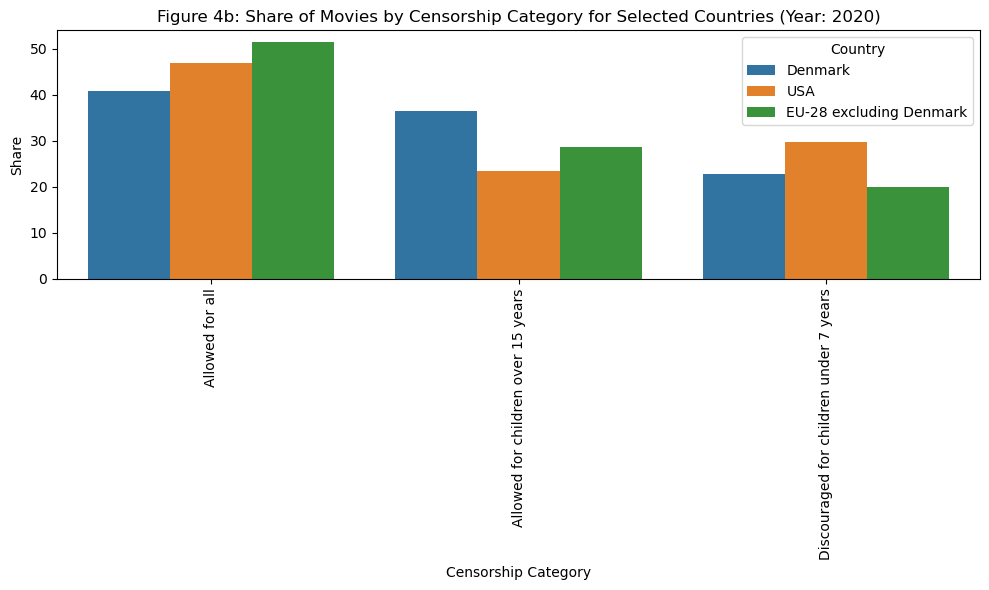

In [16]:
# Plotting the share of censorship type by country for 2020
dp.plot_censorship_graph_new('2020', selected_countries, "Figure 4b")


The distribution of movies between the two years changes a bit. We observe a slight change in the distribuution of movies moving from "Tilladt for børn over 15 år" in 2019 to "Tilladt for alle" in 2020, which is the case for especially the US but also for Denmark. For the EU-28 there seems to be a change from "Frarådet for børn under 7 år" in 2019 to "Tilladt for børn over 15 år" in 2020. The opposite shift is seen for Denmark. 

In 2020 both Denmark, the US and the EU-28 countries have the highest share of movies in the category "Tilladt for alle". Denmark has the lowest share of movies within the category "Frarådet for børn under 7 år", which also is the case for the EU-28 countries, whereas the US has the lowest share of movies within the category "Tilladt for børn over 15 år". This implies that there might be more censorship for children in the US compared to the EU, or that less moviea are produced in the EU, which demands censorship. 

Funny enough we see that each of the countries has a "dominant" category, where they have the highest share between them in 2020. For Denmark this is the category "Tilladt for børn over 15 år", for the US it is the category "Frarådet for børn under 7 år" and for the EU-28 countries the category is "Tilladt for alle". This was not the case in 2019 where the EU-28 countries were dominating in two of the categories, and Denmark and the US being almost equal in their distribution in the last category. 

Lastly we make an interactive plot in terms of number of movies by country to make it easier to examine each country/area. 

In [17]:
# Plotting the interactive plot for Denmark, USA, and EU-28 excluding Denmark
dp.plot_number_of_movies_interactive(selected_countries, "Figure 5")

interactive(children=(Dropdown(description='Country:', options=('Denmark', 'USA', 'EU-28 excluding Denmark'), …

The graph above simply shows the number of movies by country, but is interactive with a dropdown menu in terms of selecting the country. This means that we quickly can show the distribution of moviea over years for the three different countries/areas withouot having three different graphs beside each other. This makes it easier to see the development of movies in the areas, when comparing it to Figure 1, where it is less clear. This is due to the fact that the number of movies in each area is very different in size, why we have to "zoom" out to enhance all of the areas in Figure 1. Figure 5 makes the data easy to compare in a quick manner. The only thing we should keep in mind when using this kind of graph is that the y-axis changes for each country/area selected. 

# Conclusion

In this data analysis project we looked in to the development of movies and sold tickets, where we focused on DK, US and EU-28 excluding Denmark. We used data stemming from DST using an API, with data ranging from 2015 until 2023. We further analyzed the censorship types with regards to both absolute and the share of total movies. 

In general we find that the US has the highest number both for movies and for sold tickets, though to this we see that the effect of Covid-19 lock down had a huge effect on the movie-market in the US as shown in the analysis above. Also a shift in the censorship type happen from 2019 to 2020, where a larger share of movies produced in the US went from being allowed for children over 15 years to being allowed for everyone. 

We observe that in general there is being produced a larger share of movies which is allowed for everyone (or allowed for children older than 15 years), which might be due to the fact that a larger share of people will be able to watch the movies, compared to limiting the movies to a certain age, which in fact will yield higher profits for the producers.